# Логистическая регрессия. Отчет

### 1. Какое качество получилось у логистической регрессии над всеми исходными признаками? Как оно соотносится с качеством градиентного бустинга? Чем вы можете объяснить эту разницу? Быстрее ли работает логистическая регрессия по сравнению с градиентным бустингом?: 

Наилучшее качество (С=100000): 0.72. Это приблизительно равно качеству градиентного бустинга с 400 деревьями.
Логистическая регрессия работает быстрее градиентного бустинга примерно в 3 раза (для 30 деревьев и С=0.00001) и в 67 раз (для 400 деревьев и С=10000000).

### 2. Как влияет на качество логистической регрессии удаление категориальных признаков (укажите новое значение метрики качества)? Чем вы можете объяснить это изменение?

Удаление категориальных признаков практически не влияет на качество регрессии. Значение метрики - 0.71

### 3. Сколько различных идентификаторов героев существует в данной игре?

112

### 4. Какое получилось качество при добавлении "мешка слов" по героям? Улучшилось ли оно по сравнению с предыдущим вариантом? Чем вы можете это объяснить?

0.75. Качество улучшилось. Это связано с тем, что вместо удаления информативных категориальных признаков мы заменили их на числовые аналоги с сохранением их смысла. Таким образом мы не потеряли признаки, которые, как оказалось, имеют немалый вес.

### 5. Какое минимальное и максимальное значение прогноза на тестовой выборке получилось у лучшего из алгоритмов?

Минимальные 0.009

Максимальное 0.997

In [7]:
import pandas as pd
import numpy as np
import time
import datetime
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.cross_validation import KFold
from sklearn.cross_validation import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from __future__ import division

data = pd.read_csv('data/features.csv', index_col='match_id')
data_heroes = pd.read_csv('data/dictionaries/heroes.csv')
data_test = pd.read_csv('data/features_test.csv', index_col='match_id')

### 1. Оцените качество логистической регрессии (sklearn.linear_model.LogisticRegression с L2-регуляризацией) с помощью кросс-валидации по той же схеме, которая использовалась для градиентного бустинга. Подберите при этом лучший параметр регуляризации (C).

In [3]:
data.fillna(value=0, inplace=True)
X = data.drop([
    'duration', 
    'radiant_win', 
    'tower_status_radiant', 
    'tower_status_dire', 
    'barracks_status_radiant',
    'barracks_status_dire'
], axis=1)
y_train = data['radiant_win']
scaler = StandardScaler()
X.fillna(value=0, inplace=True)
X_train = scaler.fit_transform(X)

scores = []
C = [0.00001, 0.001, 0.1, 1, 10, 1000, 100000, 10000000]
kf = KFold(n=len(y_train.values), n_folds=5, shuffle=True, random_state=42)
for c in C:
    clf = LogisticRegression(C=c, random_state=42)
    start_time = datetime.datetime.now()
    score = cross_val_score(clf, X_train, y_train, cv=kf, scoring='roc_auc')
    print 'Time elapsed: ', datetime.datetime.now() - start_time
    print 'c:', c, ' Score:', score
    scores.append(np.mean(score))

Time elapsed:  0:00:04.130000
c: 1e-05  Score: [ 0.6931532   0.69481539  0.69571379  0.69513159  0.69699445]
Time elapsed:  0:00:10.534000
c: 0.001  Score: [ 0.71449541  0.71577214  0.71625974  0.71697301  0.71831738]
Time elapsed:  0:00:14.494000
c: 0.1  Score: [ 0.71462192  0.71617479  0.71619187  0.71737596  0.7182712 ]
Time elapsed:  0:00:15.158000
c: 1  Score: [ 0.71461815  0.71617185  0.71618338  0.7173762   0.71826341]
Time elapsed:  0:00:15.052000
c: 10  Score: [ 0.71461695  0.71617179  0.71618281  0.71737669  0.7182632 ]
Time elapsed:  0:00:15.294000
c: 1000  Score: [ 0.71461693  0.71617214  0.7161825   0.71737659  0.71826346]
Time elapsed:  0:00:14.538000
c: 100000  Score: [ 0.71461693  0.71617215  0.71618252  0.71737661  0.71826345]
Time elapsed:  0:00:14.592000
c: 10000000  Score: [ 0.71461693  0.71617215  0.71618252  0.71737661  0.71826345]


### 2. Уберите категориальные признаки из выборки, и проведите кросс-валидацию для логистической регрессии на новой выборке с подбором лучшего параметра регуляризации. 

In [74]:
X = data.drop([
    'duration', 
    'radiant_win', 
    'tower_status_radiant', 
    'tower_status_dire', 
    'barracks_status_radiant',
    'barracks_status_dire',
    'lobby_type',
], axis=1)
for n in range(1, 6):
    X.drop(['r{}_hero'.format(n)], axis=1)
    X.drop(['d{}_hero'.format(n)], axis=1)
y_train = data['radiant_win']
scaler = StandardScaler()
X.fillna(value=0, inplace=True)
X_train = scaler.fit_transform(X)

scores = []
C = [0.00001, 0.001, 0.1, 1, 10, 1000, 100000, 10000000]
kf = KFold(n=len(y_train.values), n_folds=5, shuffle=True, random_state=42)
for c in C:
    clf = LogisticRegression(C=c, random_state=42)
    start_time = datetime.datetime.now()
    score = cross_val_score(clf, X_train, y_train, cv=kf, scoring='roc_auc')
    print 'Time elapsed: ', datetime.datetime.now() - start_time
    print 'c:', c, ' Score:', score
    scores.append(np.mean(score))

Time elapsed:  0:00:03.329000
c: 1e-05  Score: [ 0.69315871  0.69479523  0.69564582  0.69518196  0.69694992]
Time elapsed:  0:00:10.308000
c: 0.001  Score: [ 0.71454097  0.71576992  0.71623277  0.71701307  0.71829979]
Time elapsed:  0:00:14.315000
c: 0.1  Score: [ 0.7146576   0.71617303  0.71617642  0.71739988  0.71825905]
Time elapsed:  0:00:14.589000
c: 1  Score: [ 0.71465418  0.7161692   0.7161687   0.71739792  0.71825005]
Time elapsed:  0:00:14.410000
c: 10  Score: [ 0.71465377  0.71616925  0.71616883  0.71739829  0.71824948]
Time elapsed:  0:00:14.420000
c: 1000  Score: [ 0.71465364  0.71616924  0.71616864  0.71739836  0.71824937]
Time elapsed:  0:00:14.659000
c: 100000  Score: [ 0.71465364  0.71616924  0.7161686   0.71739837  0.71824937]
Time elapsed:  0:00:15.522000
c: 10000000  Score: [ 0.71465364  0.71616924  0.7161686   0.71739837  0.71824937]


### 3. Выясните из данных, сколько различных идентификаторов героев существует в данной игре.

In [4]:
print 'Hero count: ' + str(data_heroes.shape[0])

Hero count: 112


### 4. Воспользуемся подходом "мешок слов" для кодирования информации о героях.

In [2]:
N = data_heroes.shape[0]
X_pick = np.zeros((data.shape[0], N))

for i, match_id in enumerate(data.index):
    for p in xrange(5):
        X_pick[i, data.loc[match_id, 'r%d_hero' % (p+1)]-1] = 1
        X_pick[i, data.loc[match_id, 'd%d_hero' % (p+1)]-1] = -1

### 5. Проведите кросс-валидацию для логистической регрессии на новой выборке с подбором лучшего параметра регуляризации.

In [3]:
X = data.drop([
    'duration', 
    'radiant_win', 
    'tower_status_radiant', 
    'tower_status_dire', 
    'barracks_status_radiant',
    'barracks_status_dire',
    'lobby_type',
], axis=1)
for n in range(1, 6):
    X.drop(['r{}_hero'.format(n)], axis=1)
    X.drop(['d{}_hero'.format(n)], axis=1)

# forming bag-of-words      
X_pick_transp = np.transpose(X_pick)
for i in range(0, N):
    X["bow_"+str(i)] = pd.Series(X_pick_transp[i], index=data.index)

y_train = data['radiant_win']
scaler = StandardScaler()
X.fillna(value=0, inplace=True)
X_train = scaler.fit_transform(X)

scores = []
C = [0.00001, 0.001, 0.1, 1, 10, 1000, 100000, 10000000]
kf = KFold(n=len(y_train.values), n_folds=5, shuffle=True, random_state=42)
for c in C:
    clf = LogisticRegression(C=c, random_state=42)
    start_time = datetime.datetime.now()
    score = cross_val_score(clf, X_train, y_train, cv=kf, scoring='roc_auc')
    print 'Time elapsed: ', datetime.datetime.now() - start_time
    print 'c:', c, ' Score:', score
    scores.append(np.mean(score))

Time elapsed:  0:00:07.923000
c: 1e-05  Score: [ 0.71232219  0.71414825  0.71442411  0.71647376  0.71664742]
Time elapsed:  0:00:19.797000
c: 0.001  Score: [ 0.74890517  0.7522602   0.74929734  0.75585436  0.75156937]
Time elapsed:  0:00:31.107000
c: 0.1  Score: [ 0.74938328  0.75312868  0.7493699   0.75610595  0.75149897]
Time elapsed:  0:00:31.032000
c: 1  Score: [ 0.74937961  0.75312484  0.74936322  0.75609744  0.75148981]
Time elapsed:  0:00:29.985000
c: 10  Score: [ 0.74937942  0.753125    0.74936265  0.75609606  0.7514887 ]
Time elapsed:  0:00:30.078000
c: 1000  Score: [ 0.74937939  0.75312504  0.74936235  0.75609589  0.75148854]
Time elapsed:  0:00:30.141000
c: 100000  Score: [ 0.74937941  0.75312504  0.74936234  0.75609589  0.75148853]
Time elapsed:  0:00:30.082000
c: 10000000  Score: [ 0.74937941  0.75312504  0.74936234  0.75609589  0.75148853]


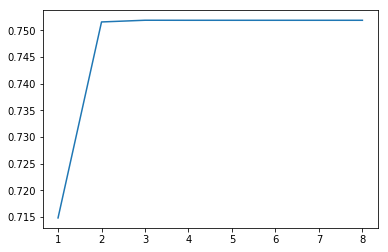

In [4]:
plt.plot([1, 2, 3, 4, 5, 6, 7, 8], scores)
plt.show()

### 6. Постройте предсказания вероятностей победы команды Radiant для тестовой выборки с помощью лучшей из изученных моделей (лучшей с точки зрения AUC-ROC на кросс-валидации).

In [6]:
# Forming test features -----------------------------------------------
N = data_heroes.shape[0]
X_pick = np.zeros((data_test.shape[0], N))
for i, match_id in enumerate(data_test.index):
    for p in xrange(5):
        X_pick[i, data_test.loc[match_id, 'r%d_hero' % (p+1)]-1] = 1
        X_pick[i, data_test.loc[match_id, 'd%d_hero' % (p+1)]-1] = -1
        
X = data_test.drop(['lobby_type'], axis=1)
for n in range(1, 6):
    X.drop(['r{}_hero'.format(n)], axis=1)
    X.drop(['d{}_hero'.format(n)], axis=1)

# forming bag-of-words      
X_pick_transp = np.transpose(X_pick)
for i in range(0, N):
    X["bow_"+str(i)] = pd.Series(X_pick_transp[i], index=data_test.index)

scaler = StandardScaler()
X.fillna(value=0, inplace=True)
X_test = scaler.fit_transform(X)

# Test
clf.fit(X_train, y_train)
prob_pos = clf.predict_proba(X_test)

print 'min ' + str(min(prob_pos[:, 1]))
print 'max ' + str(max(prob_pos[:, 1]))

min0.00892501228453
max0.996509452456
